# <b><span style='color:#209be3'>|</span> Завдання частина 1</b>

## <b><span style='color:#F1C40F'>|</span> Імпорт бібліотек та завантаження [даних](https://www.kaggle.com/datasets/konradb/forageable-fruit?resource=download%20)</b>

In [1]:
import pandas as pd
import numpy as np

locations = pd.read_csv("locations.csv", low_memory=False)
locations

,id,type_ids,lat,lng,unverified,description,season_start,season_stop,no_season,author,address,created_at,updated_at,access,import_link,original_ids,hidden
0,22,3,37.409849,-122.137529,False,Nice big tart oranges,December,NaN,False,Caleb,NaN,2013-01-31 21:26:20 UTC,2016-12-03 23:57:20 UTC,Private but overhanging,NaN,NaN,False
1,23,8,37.412087,-122.140182,False,"Huge trees, many of them, all along the bike p...",NaN,NaN,False,Caleb,NaN,2013-01-31 21:27:18 UTC,2016-12-03 23:48:04 UTC,Public,NaN,NaN,False
2,24,4,37.412043,-122.139700,False,NaN,NaN,NaN,False,caleb,NaN,2013-01-31 21:54:00 UTC,2016-12-03 23:42:51 UTC,Private but overhanging,NaN,NaN,False
3,25,3,37.411562,-122.139288,False,NaN,NaN,NaN,False,caleb,NaN,2013-01-31 21:55:50 UTC,2016-12-03 23:52:30 UTC,NaN,NaN,NaN,False
4,26,4,37.411252,-122.138862,False,NaN,NaN,NaN,False,caleb,NaN,2013-01-31 21:56:50 UTC,2016-12-03 23:38:36 UTC,NaN,NaN,NaN,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1501500,1830447,418,27.793571,-82.607624,False,No fruit but still has old panicles\nWas not l...,NaN,NaN,NaN,Warren,"1834 Brightwaters Blvd NE, St. Petersburg, FL ...",2023-08-01 16:57:03 UTC,2023-08-01 16:57:03 UTC,Private but overhanging,NaN,NaN,False
1501501,1830448,3486,53.814178,-3.017772,False,Probably will get eaten by the squirrels and n...,NaN,NaN,NaN,Imo,"Model Village, Blackpool FY3 9RB, UK",2023-08-01 17:34:29 UTC,2023-08-01 17:34:29 UTC,Public,NaN,NaN,False
1501502,1830449,56,20.996147,-89.693259,False,Un nopal grande con tunas. 1/8/22 todavía poca...,NaN,NaN,NaN,Minty,"A 97314, Calle 64 781, Cd Caucel, 97314 Mérida...",2023-08-01 23:57:37 UTC,2023-08-01 23:57:37 UTC,Public,NaN,NaN,False
1501503,1830450,18,28.068899,-82.445372,False,"Vigorous tree, good fruit. Is in the parking l...",NaN,NaN,False,NaN,"1321 E Fletcher Ave, Tampa, FL 33612, USA",2023-08-02 01:12:47 UTC,2023-08-02 01:12:47 UTC,NaN,NaN,NaN,False


## <b><span style='color:#F1C40F'>|</span> Огляд та очистка даних</b>

In [2]:
locations_clean = locations.dropna(subset=['type_ids', 'lat'])
locations_clean.loc[:, 'type_ids'] = locations_clean['type_ids'].str.replace(',', '').str.strip()
locations_clean.loc[:, 'type_ids'] = pd.to_numeric(locations_clean['type_ids'], errors='coerce')
locations_clean = locations_clean.dropna(subset=['type_ids'])
locations_clean['type_ids'] = locations_clean['type_ids'].astype(int)

In [3]:
# Видалення колонок, які не є числовими
numeric_cols = locations_clean.select_dtypes(include=[np.number]).columns
locations_numeric = locations_clean[numeric_cols]

## <b><span style='color:#F1C40F'>|</span> Аналіз кореляції</b>

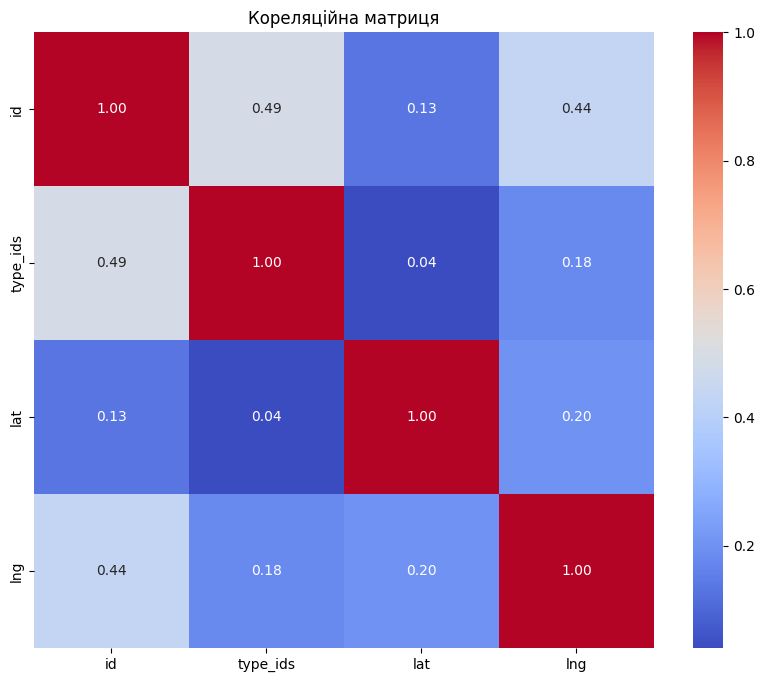

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(10, 8))
sns.heatmap(locations_numeric.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Кореляційна матриця')
plt.show()

## <b><span style='color:#F1C40F'>|</span> Простий лінійний регресійний аналіз:</b>

In [5]:
import statsmodels.api as sm


X_simple = locations_numeric['lat']
y_simple = locations_numeric['lng']

X_simple = sm.add_constant(X_simple)

model_simple = sm.OLS(y_simple, X_simple).fit()

print(model_simple.summary())

                            OLS Regression Results                            
Dep. Variable:                    lng   R-squared:                       0.042
Model:                            OLS   Adj. R-squared:                  0.042
Method:                 Least Squares   F-statistic:                 6.418e+04
Date:                Sun, 20 Oct 2024   Prob (F-statistic):               0.00
Time:                        15:37:39   Log-Likelihood:            -7.8459e+06
No. Observations:             1471657   AIC:                         1.569e+07
Df Residuals:                 1471655   BIC:                         1.569e+07
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -123.8183      0.204   -606.072      0.0

### Проста лінійна регресія:
* Коефіцієнти:
    * const: -123.82
    * lat: 1.20
* R-квадрат: 0.042
    * Це свідчить про те, що лише 4.2% варіації lng пояснюється зміною lat. Модель не є сильною, і в ній можуть бути інші фактори, що впливають на lng.
* P-значення: 0.00 для обох змінних (константи та lat), що свідчить про статистичну значущість цих змінних у моделі.


## <b><span style='color:#F1C40F'>|</span> Множинна лінійна регресія:</b>

In [6]:
X_multiple = locations_numeric[['lat', 'type_ids']]
y_multiple = locations_numeric['lng']

X_multiple = sm.add_constant(X_multiple)

model_multiple = sm.OLS(y_multiple, X_multiple).fit()

print(model_multiple.summary())

                            OLS Regression Results                            
Dep. Variable:                    lng   R-squared:                       0.071
Model:                            OLS   Adj. R-squared:                  0.071
Method:                 Least Squares   F-statistic:                 5.656e+04
Date:                Sun, 20 Oct 2024   Prob (F-statistic):               0.00
Time:                        15:37:40   Log-Likelihood:            -7.8228e+06
No. Observations:             1471657   AIC:                         1.565e+07
Df Residuals:                 1471654   BIC:                         1.565e+07
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -129.1112      0.203   -637.282      0.0

### Множинна лінійна регресія:
* Коефіцієнти:
    * const: -129.11
    * lat: 1.15
    * type_ids: 0.0094
* R-квадрат: 0.071
    * Це вказує на те, що 7.1% варіації lng можна пояснити змінами lat та type_ids. Хоча це покращення у порівнянні з простою регресією, все ще залишається низьким значенням.
* P-значення: 0.00 для всіх змінних, що також свідчить про їх статистичну значущість.

## <b><span style='color:#F1C40F'>|</span> Додатковий аналіз</b>

In [7]:
def analyze_results(model):
    print("Коефіцієнти:")
    print(model.params)
    print("\nP-значення:")
    print(model.pvalues)
    print("\nДіагностичні показники:")
    print(f"Кількість спостережень: {model.nobs}")
    print(f"AIC: {model.aic}")
    print(f"BIC: {model.bic}")

print("\nАналіз результатів простої лінійної регресії:")
analyze_results(model_simple)

print("\nАналіз результатів множинної лінійної регресії:")
analyze_results(model_multiple)


Аналіз результатів простої лінійної регресії:
Коефіцієнти:
const   -123.818285
lat        1.195045
dtype: float64

P-значення:
const    0.0
lat      0.0
dtype: float64

Діагностичні показники:
Кількість спостережень: 1471657.0
AIC: 15691853.80901162
BIC: 15691878.21281069

Аналіз результатів множинної лінійної регресії:
Коефіцієнти:
const      -129.111245
lat           1.154551
type_ids      0.009437
dtype: float64

P-значення:
const       0.0
lat         0.0
type_ids    0.0
dtype: float64

Діагностичні показники:
Кількість спостережень: 1471657.0
AIC: 15645689.065119954
BIC: 15645725.670818558


# <b><span style='color:#209be3'>|</span> Завдання частина 2</b>

## <b><span style='color:#F1C40F'>|</span> Підготовка [даних](https://www.kaggle.com/datasets/rukenmissonnier/manufacturing-data-for-polynomial-regression):</b>

### Набір даних має такі стовпці:

* Temperature (°C): температура під час процесу.
* Pressure (kPa): тиск під час процесу.
* Temperature x Pressure: взаємодія температури і тиску.
* Material Fusion Metric: метрика злиття матеріалів.
* Material Transformation Metric: метрика трансформації матеріалів.
* Quality Rating: цільова змінна, яка представляє якість продукції.

In [8]:
import pandas as pd

manufacturing = pd.read_csv("manufacturing.csv")
manufacturing

,Temperature (°C),Pressure (kPa),Temperature x Pressure,Material Fusion Metric,Material Transformation Metric,Quality Rating
0,209.762701,8.050855,1688.769167,44522.217074,9.229576e+06,99.999971
1,243.037873,15.812068,3842.931469,63020.764997,1.435537e+07,99.985703
2,220.552675,7.843130,1729.823314,49125.950249,1.072839e+07,99.999758
3,208.976637,23.786089,4970.736918,57128.881547,9.125702e+06,99.999975
4,184.730960,15.797812,2918.345014,38068.201283,6.303792e+06,100.000000
...,...,...,...,...,...,...
3952,156.811578,21.794290,3417.596965,34941.963896,3.855501e+06,100.000000
3953,197.850406,8.291704,1640.516924,39714.857236,7.744742e+06,99.999997
3954,241.357144,16.391910,3956.304672,62657.690952,1.405957e+07,99.989318
3955,209.040239,23.809936,4977.234763,57195.985528,9.134036e+06,99.999975


## <b><span style='color:#F1C40F'>|</span> Візуалізація даних:</b>

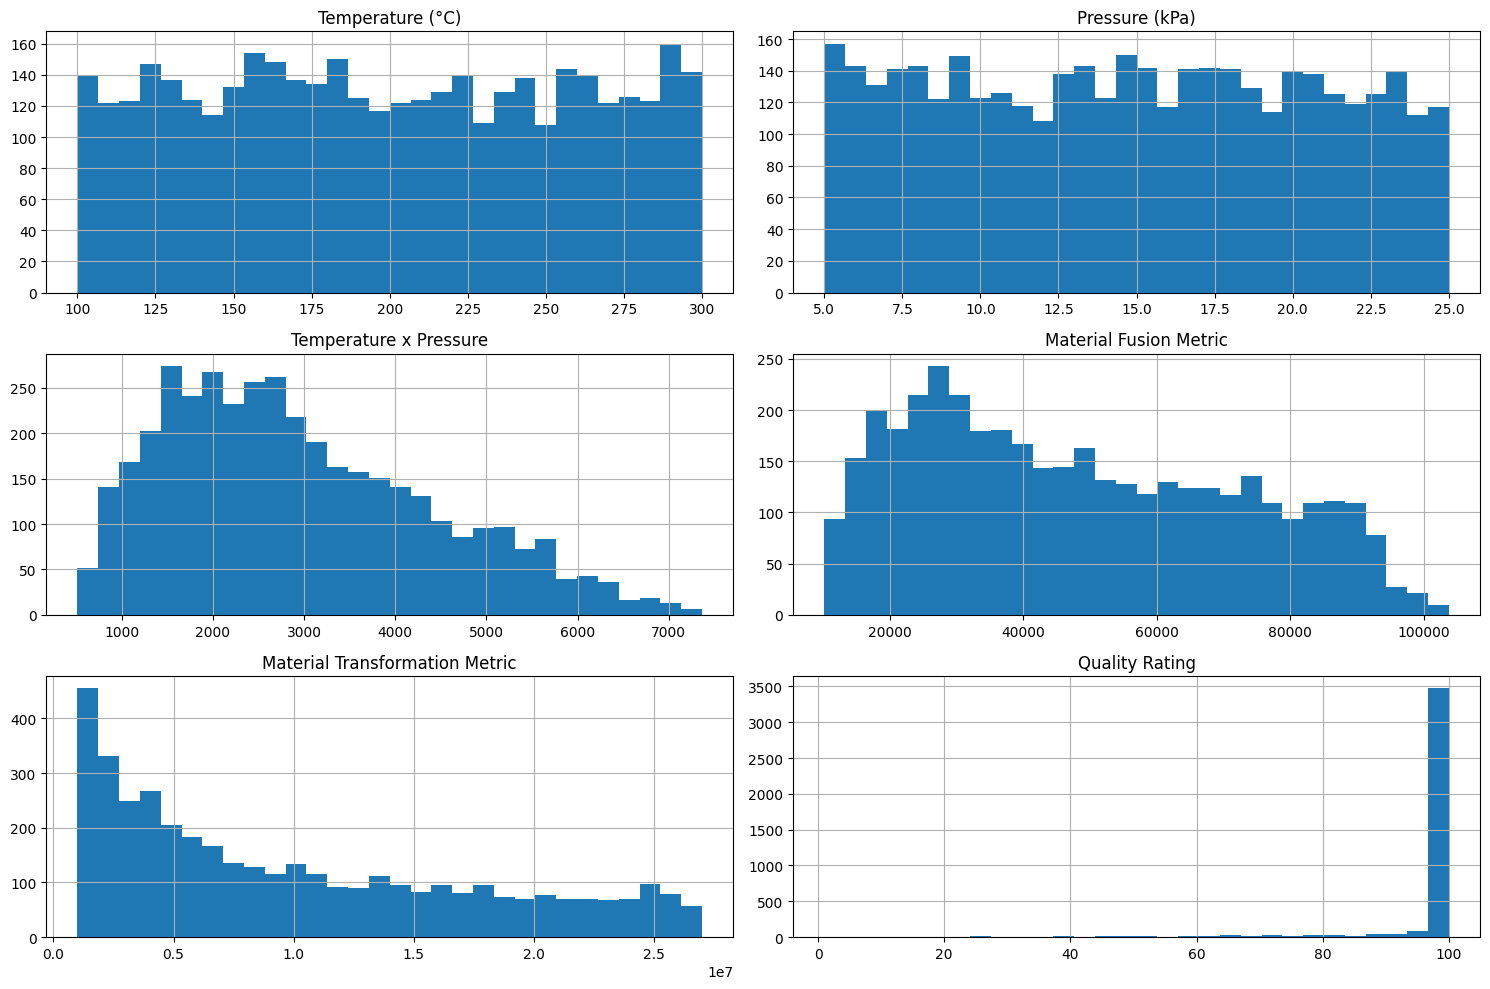

In [9]:
import matplotlib.pyplot as plt


manufacturing.hist(bins=30, figsize=(15, 10))
plt.tight_layout()
plt.show()

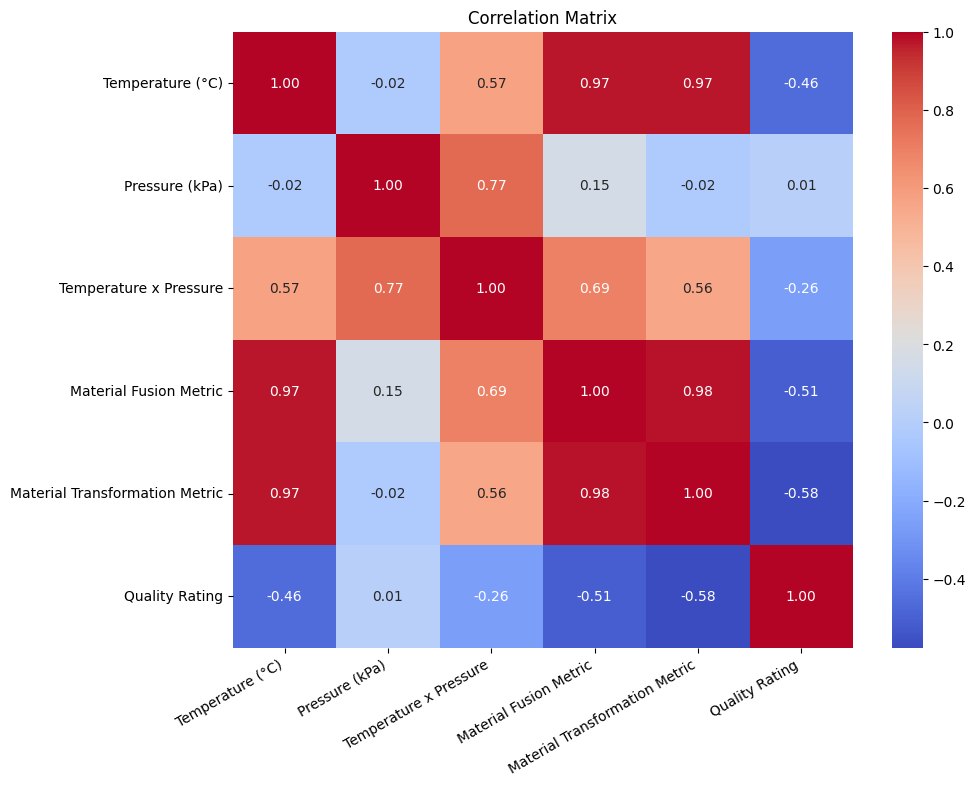

In [10]:
import seaborn as sns


plt.figure(figsize=(10, 8))
sns.heatmap(manufacturing.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Matrix")
plt.xticks(rotation=30, ha='right')
plt.show()

## <b><span style='color:#F1C40F'>|</span> Регресія:</b>

In [11]:
from sklearn.model_selection import train_test_split

X = manufacturing[['Temperature (°C)', 'Pressure (kPa)', 'Temperature x Pressure']]
y = manufacturing['Quality Rating']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### <b><span style='color:#F1C40F'>|</span> Поліноміальна регресія:</b>

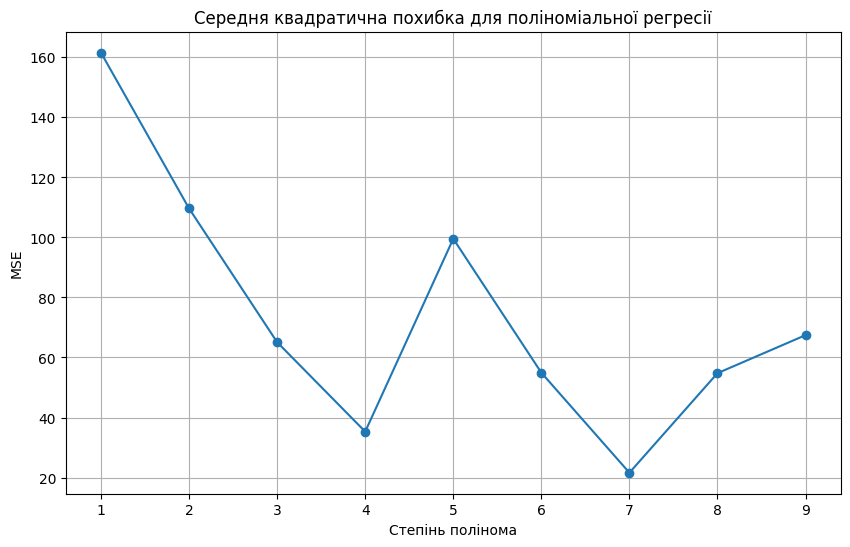

In [12]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


mse_results_poly = []

for degree in range(1, 10):
    poly_features = PolynomialFeatures(degree=degree)
    X_poly_train = poly_features.fit_transform(X_train)
    X_poly_test = poly_features.transform(X_test)

    model = LinearRegression()
    model.fit(X_poly_train, y_train)
    y_pred = model.predict(X_poly_test)

    mse = mean_squared_error(y_test, y_pred)
    mse_results_poly.append(mse)


# Візуалізація результатів
plt.figure(figsize=(10, 6))
plt.plot(range(1, 10), mse_results_poly, marker='o')
plt.title("Середня квадратична похибка для поліноміальної регресії")
plt.xlabel("Степінь полінома")
plt.ylabel("MSE")
plt.xticks(range(1, 10))
plt.grid()
plt.show()

### <b><span style='color:#F1C40F'>|</span> Логарифмічна регресія:</b>

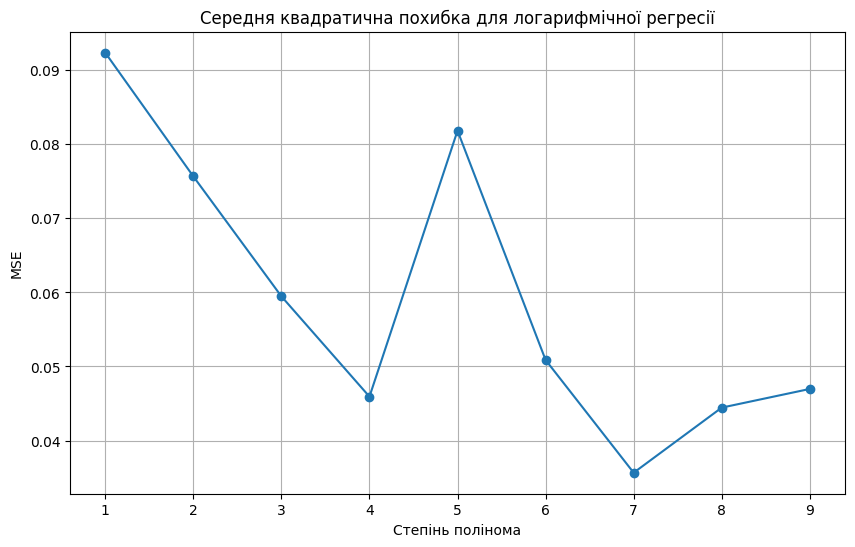

In [13]:
import numpy as np


# Логарифмічна трансформація цільової змінної
y_log = np.log(y)

# Розподіл даних
X_train_log, X_test_log, y_train_log, y_test_log = train_test_split(X, y_log, test_size=0.2, random_state=42)

mse_results_log = []


# Обчислення MSE для різних ступенів поліномів
for degree in range(1, 10):
    poly_features = PolynomialFeatures(degree=degree)
    X_poly_train_log = poly_features.fit_transform(X_train_log)
    X_poly_test_log = poly_features.transform(X_test_log)

    model_log = LinearRegression()
    model_log.fit(X_poly_train_log, y_train_log)
    y_pred_log = model_log.predict(X_poly_test_log)

    mse_log = mean_squared_error(y_test_log, y_pred_log)
    mse_results_log.append(mse_log)


# Візуалізація результатів
plt.figure(figsize=(10, 6))
plt.plot(range(1, 10), mse_results_log, marker='o', label='Logarithmic Regression')
plt.title("Середня квадратична похибка для логарифмічної регресії")
plt.xlabel("Степінь полінома")
plt.ylabel("MSE")
plt.xticks(range(1, 10))
plt.grid()
plt.show()

## <b><span style='color:#F1C40F'>|</span> Порівняння моделей:</b>

In [14]:
mse_poly_min = min(mse_results_poly)
print(f"Мінімальне MSE для поліноміальної регресії: {mse_poly_min}")

print(f"Мінімальне MSE для логарифмічної регресії: {mse_log}")

Мінімальне MSE для поліноміальної регресії: 21.65565087790733
Мінімальне MSE для логарифмічної регресії: 0.04696328642320126
